# 2 Microscopic Traffic Simulation

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 2.1 Model building and generate random vehicle input  


First, we need to generate random vehicle arrival times that follows the poisson distribution. In this case, the arrival times are directly representing the time that the vehicle is loaded on the road. We assume that the arrival rate of vehicles is 3000/3600, meaning that there will be 3000 vehicles loading on the road in one hour. 
<!-- And we use the method that mentioned in th Sheldon M. Ross's simulation book to decide when to stop generate new vehicle. -->

In [2]:
def generate_poisson_distribution_random_variable(lmbda):   
    U = np.random.random()
    i = 0
    p = np.exp(-lmbda)
    F = p

    while U >= F:
        i += 1
        p = (lmbda * p) / i
        F += p

    return i
       

    # k = 101
    # while True:
    #     U = np.random.rand()
    #     i = 0
    #     p = np.exp(-lmbda)
    #     F = p

    #     while U >= F:
    #         i += 1
    #         p = (lmbda * p) / i
    #         F += p

    #     generated_arrivals.append(i)  

    #     # Calculate the sample standard deviation
    #     std_dev = np.std(generated_arrivals)

    #     # Check the stopping condition
    #     if (std_dev / np.sqrt(k)) < target_std_dev:
    #         break

    #     k += 1

    # return generated_arrivals

# Example usage
vehicle_count = 3000  # Total number of vehicles
arrival_rate = 3000/3600  # Arrival rate of 3000 vehicles per hour
# target_std_dev = 0.2  # Set the acceptable value for the standard deviation
arrival_times = [generate_poisson_distribution_random_variable(arrival_rate) for _ in range(vehicle_count)]
print(arrival_times)
print('vehicle number:',len(arrival_times))

[0, 0, 1, 2, 1, 0, 0, 1, 0, 2, 2, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 2, 0, 1, 0, 2, 1, 0, 2, 1, 0, 0, 1, 2, 0, 1, 2, 2, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 2, 1, 3, 2, 1, 1, 3, 3, 1, 1, 3, 1, 1, 2, 1, 1, 1, 1, 2, 0, 0, 2, 3, 0, 1, 1, 0, 1, 1, 1, 0, 3, 0, 1, 1, 2, 0, 0, 0, 2, 1, 0, 0, 0, 0, 2, 1, 1, 1, 1, 0, 0, 1, 0, 0, 2, 2, 0, 3, 0, 2, 3, 0, 0, 2, 0, 0, 0, 0, 1, 1, 1, 0, 2, 0, 0, 0, 4, 0, 1, 0, 0, 0, 0, 1, 1, 0, 4, 1, 0, 1, 1, 0, 0, 0, 2, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 2, 2, 1, 0, 4, 0, 0, 1, 0, 1, 1, 2, 1, 2, 1, 1, 0, 4, 1, 0, 0, 0, 1, 0, 1, 0, 0, 2, 2, 2, 0, 2, 1, 1, 1, 1, 3, 0, 0, 0, 1, 0, 1, 2, 0, 1, 1, 2, 2, 1, 2, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 3, 4, 0, 0, 1, 1, 0, 1, 1, 0, 2, 0, 0, 0, 0, 0, 2, 2, 1, 0, 0, 1, 2, 1, 0, 2, 3, 2, 1, 2, 0, 1, 2, 0, 0, 0, 2, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 3, 0, 1, 1, 0, 0, 0, 0, 2, 3, 0, 1, 2, 1, 0, 0, 0, 3, 0, 1, 2, 0, 0, 2, 1, 2, 0, 1, 0, 1, 1, 0, 2, 1, 0, 0, 3, 0, 3, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 

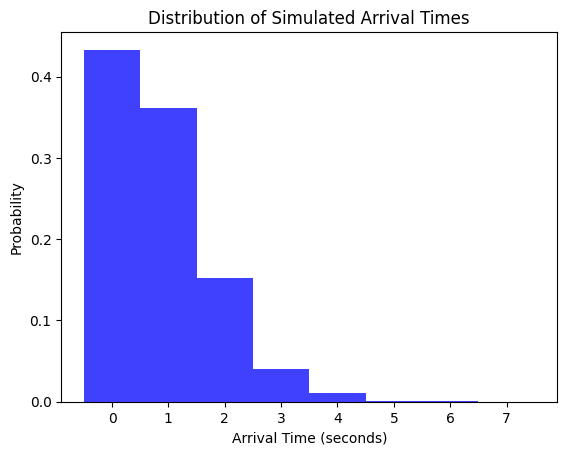

In [3]:
# Plot the distribution of arrival times
plt.hist(arrival_times, bins=np.arange(min(arrival_times), max(arrival_times) + 1) - 0.5, density=True, alpha=0.75, color='b')
plt.title('Distribution of Simulated Arrival Times')
plt.xlabel('Arrival Time (seconds)')
plt.ylabel('Probability')
plt.show()

After generating the vehicles by python, we write them to the xml file called AH2174_2023_project1_section2.rou.xml. All these vehicles will go through from edge 1 to edge 5. We assume there are two types of vehicle. One is 'Car', its acceleration is 2.5 m/s2, its deceleration is 5m/s2, and its vehicle legnth is 5 meters. Another one is 'Bus', its accelaration is 1.5 m/s2, its deceleration is 4 m/s2, and it vehicle length is 18 meters. And we assign the vehicle type randomly to each vehicle. But considering that normally there will be more cars on the road, so we assume a vehicle 70 percent probability to be a car.  

In [4]:
# Write arrivals to a file (e.g., sumo_test.arr.xml)
with open('AH2174_2023_project1_section2.rou.xml', 'w') as f:
    f.write('<routes>\n')
    f.write('<vType accel="2.5" decel="5.0" id="Car" length="5.0" maxSpeed="40" sigma="0.0"/>\n')
    f.write('<vType accel="1.5" decel="4.0" id="Bus" length="18.0" maxSpeed="25" sigma="0.0"/>\n')
    f.write('<route id="r1" edges="edge1 edge2 edge3 edge4 edge5"/>\n')

    # Sort vehicles by departure time
    sorted_arrival_times = sorted(enumerate(arrival_times), key=lambda x: x[1])

    for num_vehicles,time in sorted_arrival_times:
        vehicle_type = np.random.choice(['Car', 'Bus'], size=1,p=[0.7, 0.3])[0]
        f.write(f'<vehicle depart="{time}" route="r1" id="{num_vehicles}" type="{vehicle_type}"/>\n')
    f.write('</routes>')

To check the number of vehicles loaded on the specific highway section in a SUMO simulation, we can use the traci module, which is the interface for interacting with a running SUMO simulation.  We need to query the vehicles that are currently present on the edges representing the highway section of interest.

In [5]:
import traci
import traci.constants as tc

# Start the SUMO simulation with your configuration file (e.g., sumo_test.sumocfg)
traci.start(["sumo", "-c", "AH2174_2023_project1_section2.sumo.cfg"])

# Run the simulation for a certain number of steps
i=1
simulation_steps = 1000

# Define the edges representing the highway section (e.g., edge1, edge2, etc.)
highway_edges = ["edge1", "edge2", "edge3", "edge4", "edge5"]
for _ in range(simulation_steps):
    traci.simulationStep()
    IDList = traci.vehicle.getIDList()
    # print the vehicle info when not empty
    if len(IDList):
        # Get the list of currently loaded vehicles on the highway section
        loaded_vehicles_on_highway = [v for v in IDList if traci.vehicle.getRoadID(v) in highway_edges]
        # Get the number of loaded vehicles on the highway section
        num_loaded_vehicles_on_highway = len(loaded_vehicles_on_highway)  
        print(i, IDList)
        print(f'Number of loaded vehicles on the highway section: {num_loaded_vehicles_on_highway}')
    i=i+1
traci.close()
print("SUMO simulation finished!")


1 ('0',)
Number of loaded vehicles on the highway section: 1
2 ('0',)
Number of loaded vehicles on the highway section: 1
3 ('0',)
Number of loaded vehicles on the highway section: 1
4 ('0',)
Number of loaded vehicles on the highway section: 1
5 ('0', '1')
Number of loaded vehicles on the highway section: 2
6 ('0', '1')
Number of loaded vehicles on the highway section: 2
7 ('0', '1')
Number of loaded vehicles on the highway section: 2
8 ('0', '1', '5')
Number of loaded vehicles on the highway section: 3
9 ('0', '1', '5')
Number of loaded vehicles on the highway section: 3
10 ('0', '1', '5')
Number of loaded vehicles on the highway section: 3
11 ('0', '1', '5', '6')
Number of loaded vehicles on the highway section: 4
12 ('0', '1', '5', '6')
Number of loaded vehicles on the highway section: 4
13 ('0', '1', '5', '6', '8')
Number of loaded vehicles on the highway section: 5
14 ('0', '1', '5', '6', '8')
Number of loaded vehicles on the highway section: 5
15 ('0', '1', '5', '6', '8')
Number 

We let the simulation run 100 steps first, and print the ID and number of loaded vehicles on the highway section in each step. As the results shown, we can observe that vehicles are dynamically entering and exiting the highway, which is expected in a traffic simulation. Factors such as vehicle behavior of different vehicle types, lane changes contribute to this variability; It is also important to notice that not all vehicles may be loaded onto the highway at the start of the simulation, even they depart at 0th second. The simulation may need some steps to fully introduce vehicles into the network; The number of loaded vehicles may also depend on the duration of the simulation. Running the simulation for a longer period may result in more vehicles entering and impacting the highway section.

## 2.2 Simulation output

To estimate and visualize average traffic speed in the simulated highway segments aggregated for a time interval of 5 minutes, we can use the TraCI API to retrieve vehicle trajectory data and calculate average speeds.

In our code, the warmup period is excluded from the analysis period, ensuring that initial vehicle loading does not affect the average speed calculations; Speed data is collected for each vehicle on the highway during the simulation; Average speed is calculated for each vehicle and for the entire highway segment; Plot the trajectories and average speeds for each vehicle, as well as the average speed for the entire highway.

In [10]:
# Start the SUMO simulation with your configuration file (e.g., AH2174_2023_project1_section2.sumo.cfg)
traci.start(["sumo", "-c", "AH2174_2023_project1_section2.sumo.cfg"])

# Run the simulation for a certain number of steps
simulation_steps = 3600  # Assuming 1 hour simulation time (excluding warmup)

# Warmup period (exclude warmup outputs)
warmup_steps = 600  # Assuming a warmup period of 600 seconds

# Define the edges representing the highway section (e.g., edge2, edge3, edge4, edge5)
highway_edges = ["edge2", "edge3", "edge4", "edge5"]

# Data for storing trajectory information for each vehicle on the highway
vehicle_trajectory_data = {}

# Run the simulation
for step in range(simulation_steps + warmup_steps):
    traci.simulationStep()

    if step >= warmup_steps:
        # Get the list of currently loaded vehicles on the highway section
        loaded_vehicles_on_highway = [v for v in traci.vehicle.getIDList() if traci.vehicle.getRoadID(v) in highway_edges]

         # Record trajectory information for each vehicle
        for vehicle_id in loaded_vehicles_on_highway:
            if vehicle_id not in vehicle_trajectory_data:
                vehicle_trajectory_data[vehicle_id] = {'positions': [], 'times': []}

            vehicle_trajectory_data[vehicle_id]['positions'].append(traci.vehicle.getPosition(vehicle_id))
            vehicle_trajectory_data[vehicle_id]['times'].append(step)
    

traci.close()
print("SUMO simulation finished!")
print(vehicle_trajectory_data)

SUMO simulation finished!
{'278': {'positions': [(4921.7, -8.0), (4946.7, -8.0), (4971.7, -8.0), (4996.7, -8.0)], 'times': [600, 601, 602, 603]}, '283': {'positions': [(4746.7, -8.0), (4771.7, -8.0), (4796.7, -8.0), (4821.7, -8.0), (4846.7, -8.0), (4871.7, -8.0), (4896.7, -8.0), (4921.7, -8.0), (4946.7, -8.0), (4971.7, -8.0), (4996.7, -8.0)], 'times': [600, 601, 602, 603, 604, 605, 606, 607, 608, 609, 610]}, '285': {'positions': [(4571.7, -8.0), (4596.7, -8.0), (4621.7, -8.0), (4646.7, -8.0), (4671.7, -8.0), (4696.7, -8.0), (4721.7, -8.0), (4746.7, -8.0), (4771.7, -8.0), (4796.7, -8.0), (4821.7, -8.0), (4846.7, -8.0), (4871.7, -8.0), (4896.7, -8.0), (4921.7, -8.0), (4946.7, -8.0), (4971.7, -8.0), (4996.7, -8.0)], 'times': [600, 601, 602, 603, 604, 605, 606, 607, 608, 609, 610, 611, 612, 613, 614, 615, 616, 617]}, '293': {'positions': [(4321.7, -8.0), (4346.7, -8.0), (4371.7, -8.0), (4396.7, -8.0), (4421.7, -8.0), (4446.7, -8.0), (4471.7, -8.0), (4496.7, -8.0), (4521.7, -8.0), (4546.7, 

In [11]:
 # Extract speeds for the specific time interval (5 minutes)
time_interval = 5 * 60  # 5 minutes in seconds
speeds_in_interval = []

for vehicle_id, data in vehicle_trajectory_data.items():
    # Find the index corresponding to the end of the time interval
    interval_end_index = np.searchsorted(data['times'], time_interval, side='right')

    # Calculate the average speed within the time interval
    if interval_end_index > 0:
        distances = np.linalg.norm(np.diff(data['positions'][:interval_end_index], axis=0), axis=1)
        speeds = distances / np.diff(data['times'][:interval_end_index])
        average_speeds_in_interval = np.mean(speeds)
        speeds_in_interval.append(average_speeds_in_interval)

# Calculate the average speed for this run within the 5-minute interval
average_speed_in_interval = np.mean(speeds_in_interval)




C:\Users\ssact\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\ssact\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


: 

## 2.3 Alternative scenario